In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
first_image = X_train[0]
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

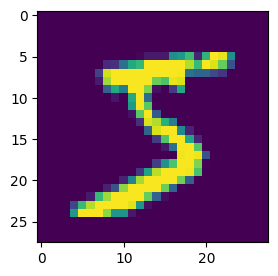

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(first_image)

In [7]:
print(y_train.shape)
y_train

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

one hot encoding the labels (y_train and y_test)

In [8]:
from tensorflow.keras.utils import to_categorical


In [9]:
y_train_cat = to_categorical(y_train, num_classes = 10)
print(y_train.shape)

(60000,)


In [10]:
y_test_cat = to_categorical(y_test, num_classes = 10)
print(y_test.shape)

(10000,)


In [11]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Scaling the input features (X_train and X_test)

In [12]:
X_train = X_train/255
X_test = X_test/255


In [13]:
X_train[0]   # all the values are scaled in the range (0,1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28,28,1)

In [15]:
X_test = X_test.reshape(10000,28,28,1)

Creating the cnn model

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Adding early stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,verbose=1)

Training the model

In [20]:
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test,y_test_cat),callbacks=early_stop)

Epoch 1/10
1875/1875 [==============================] - 66s 33ms/step - loss: 0.1360 - accuracy: 0.9577 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0307 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0269 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0278 - val_accuracy: 0.9916
Epoch 5: early stopping


Getting the metrics

In [21]:
metrics = pd.DataFrame(model.history.history)

In [22]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136012,0.957667,0.040616,0.9865
1,0.044708,0.986217,0.034442,0.9886
2,0.030876,0.990217,0.030691,0.9891
3,0.021783,0.992900,0.026917,0.9909
4,0.016655,0.994450,0.027813,0.9916


<Axes: >

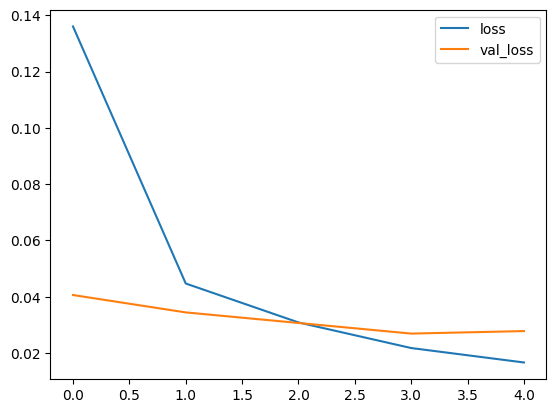

In [23]:
metrics[['loss','val_loss']].plot()
# we stopped training the model as the validation loss started to increase means the model started to overfit

<Axes: >

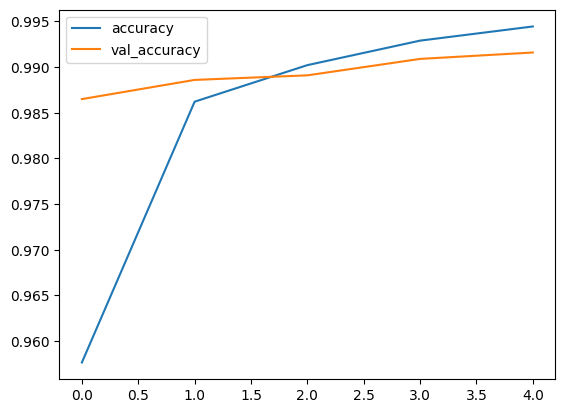

In [24]:
metrics[['accuracy','val_accuracy']].plot()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [39]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [40]:
preds = np.argmax(predictions, axis=1)

In [42]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
confusion_matrix(y_test,preds)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1130,    1,    0,    0,    0,    4,    0,    0,    0],
       [   1,    1, 1024,    1,    0,    0,    1,    3,    1,    0],
       [   1,    0,    0,  997,    0,   10,    0,    1,    1,    0],
       [   0,    0,    1,    0,  979,    0,    0,    0,    0,    2],
       [   2,    0,    0,    1,    0,  887,    1,    0,    0,    1],
       [   3,    1,    1,    0,    3,    5,  945,    0,    0,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1018,    1,    4],
       [   2,    0,    1,    0,    0,    3,    0,    2,  962,    4],
       [   0,    0,    0,    0,    6,    2,    0,    4,    1,  996]])

Prediction

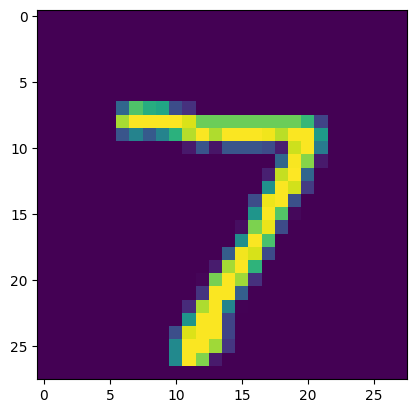

In [54]:
number = X_test[0]
plt.imshow(number)

In [46]:
number.shape

(28, 28, 1)

In [55]:
# num_images,width,height,color_channels
np.argmax(model.predict(number.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 21ms/step


array([7])